In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Data Preprocessing

In [7]:
df=pd.DataFrame(pd.read_csv('House_Price_dataset - House_Price_dataset.csv'))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,540.000000,540.000000,543.000000,541.000000
mean,4.766729e+06,5150.541284,2.961111,1.285185,1.804788,0.691312
std,1.870440e+06,2170.141023,0.738779,0.502464,0.869011,0.860070
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.select_dtypes(include=['int64', 'float64']).mean()

price        4.766729e+06
area         5.150541e+03
bedrooms     2.961111e+00
bathrooms    1.285185e+00
stories      1.804788e+00
parking      6.913124e-01
dtype: float64

In [9]:
df.select_dtypes(include=['int64', 'float64']).median()

price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [10]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df=df.fillna(df.mode().iloc[0])

In [12]:
(df.isnull()).sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:

x = df[['area']]
y = df[['price']]

In [15]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=69)

In [16]:

priceModel = LinearRegression().fit(x_train,y_train)

In [17]:
priceModel.coef_

array([[415.55438706]])

In [18]:

y_tpred = priceModel.predict(x_train)

In [19]:
train_mse = mean_squared_error(y_train,y_tpred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train,y_tpred)
print("Mean squared error",train_mse,"\nRMSE",train_rmse,"\nR^2 Score",train_r2)

Mean squared error 1988201147778.4695 
RMSE 1410035.8675503505 
R^2 Score 0.2834494800042001


<Axes: xlabel='area', ylabel='price'>

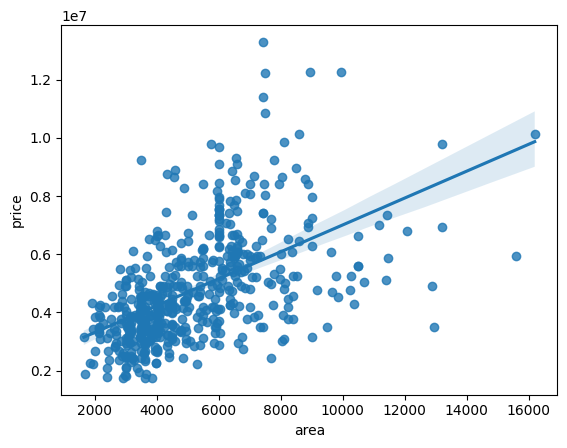

In [21]:
sns.regplot(x="area",y="price",data=df)